In [3]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

In [9]:
SIZE = 224 # размер картинки
train, _ = tfds.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True) # microsoft dataset
## _ т.к. метаданные не нужны

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


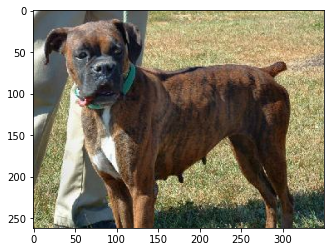

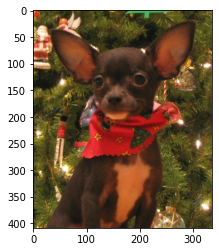

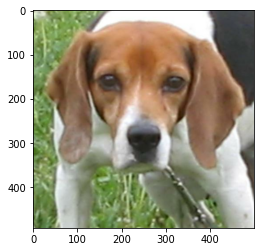

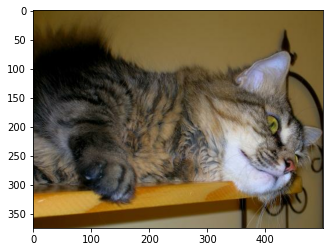

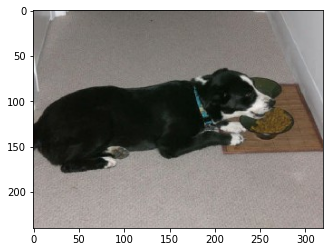

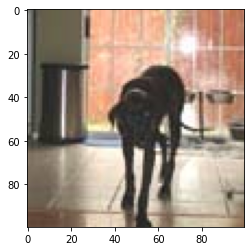

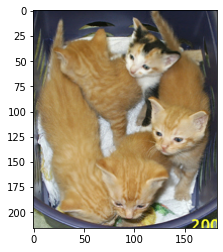

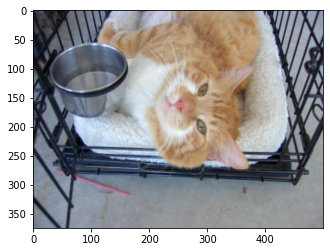

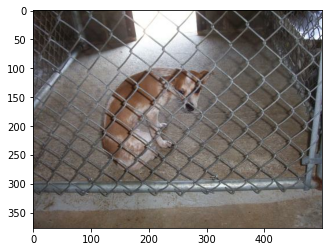

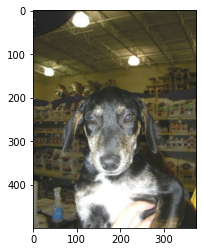

In [14]:
# картинка из обучающей выборки
for img, label in train[0].take(10):
  plt.figure()
  plt.imshow(img)
  print(label)

In [19]:
def resize_image(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (SIZE, SIZE))
  img = img / 225.0
  return img, label

In [20]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

In [21]:
# кусок предобученной сети, которая работает с разрешением 224х224
base_layers = tf.keras.applications.MobileNetV2(input_shape=(SIZE,SIZE,3), include_top=False)
base_layers.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [32]:
model = tf.keras.Sequential([
                             base_layers,
                             GlobalAveragePooling2D(), # уменьшает картинку и усредняет значения
                             Dropout(0.2), # 20% нейронов в процессе обучения будут случайно выключаться
                             Dense(1, activation='relu') # добавляем слой
])

model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [33]:
model.fit(train_batches, epochs=1) # обучение сети

1454/1454 [==============================] - 825s 567ms/step - loss: 0.3832 - accuracy: 0.9767


In [83]:
files.upload() # загружаем картинку

Saving 11.jpeg to 11.jpeg


{'11.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\xd8\x00\xd8\x00\x00\xff\xc0\x00\x11\x08\x03\x83\x03\xbf\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xff\xc4\x00\x1f\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x11\x00\x02\x01\x02\x04\x0

Text(0.5, 1.0, 'КОТ 0.0')

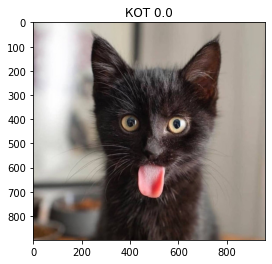

In [84]:
img = load_img('11.jpeg')
img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
#model.predict(img_expended)
prediction = model.predict(img_expended)[0][0]
pred_label = 'КОТ' if prediction < 0.5 else 'СОБАКА'
plt.figure()
plt.imshow(img)
plt.title(f'{pred_label} {prediction}')